## Binning Data

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd

data_points = [rnd.gauss(2, 0.125) for _ in range(5000)]

print(np.histogram(data_points, bins=10))

(array([   2,   34,  177,  659, 1222, 1451,  992,  376,   78,    9]), array([1.50408603, 1.59855122, 1.6930164 , 1.78748158, 1.88194677,
       1.97641195, 2.07087714, 2.16534232, 2.2598075 , 2.35427269,
       2.44873787]))


The 'np.histogram' returns 2 arrays, the first is how many data points fall into each bins. The length of the first array will be the same as the $n$ specified. The second array has a length of $n+1$ since it is the bin edges, fx. 

```
array([1.48251853, 1.5758632 , 1.66920787, 1.76255254, 1.85589721,
        1.94924188, 2.04258655, 2.13593122, 2.22927589, 2.32262056,
        2.41596523])
```

Range of bin 1: '1.48251853' - '1.5758632'

Range of bin 2: '1.5758632' - '1.66920787'

.

.

.

etc.

### Stategy:

Since counts represent number of points in each bin, and bin_edges represent the bin bounderies - we need to associate each count with a specific bin. We find the centers of each bin and plot that against the counts so we have same length for both arrays.

$$ 
center = \frac{leftEdge + rightEdge}{2}
$$


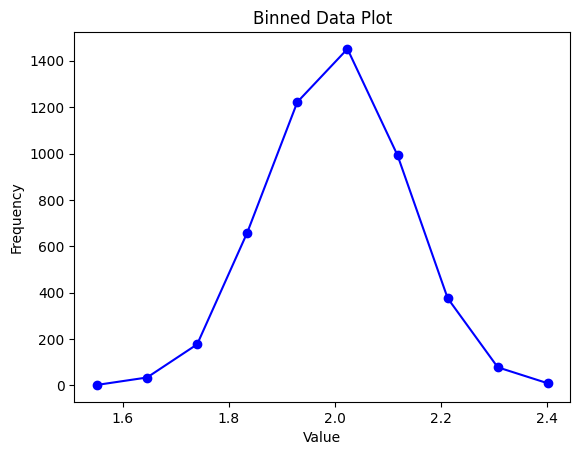

In [36]:
counts, bin_edges = np.histogram(data_points, bins=10)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the counts against the bin midpoints
plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Binned Data Plot')

# Display the plot
plt.show()


## Manual Binning


In [37]:
data_points = [np.random.poisson(10) for _ in range(5000)]

# min and max values 
data_min = min(data_points)
data_max = max(data_points)

print("Minimum value in data:", data_min)
print("Maximum value in data:", data_max)

# Create a vector v that defines the bin edges from min to max (inclusive)
v = np.arange(data_min, data_max + 2)  # +2 to ensure the last bin includes the max value

# Use numpy.histogram to bin the data into each integer bin
counts, bin_edges = np.histogram(data_points, bins=v)

# Print the results
print("Vector v (bin edges):", v)
print("Counts in each bin:", counts)



Minimum value in data: 1
Maximum value in data: 22
Vector v (bin edges): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Counts in each bin: [  4  17  41  97 190 308 454 596 629 663 543 476 335 246 157 114  56  41
  18   7   5   3]


###  What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
The sum of counts is just how many data points we have.

The min value is the same as the first edge of first bin, this makes sure the smallest value is included. The last edge for the last bin will be the max + 1 so that we make sure the max value is also included.

<BarContainer object of 22 artists>

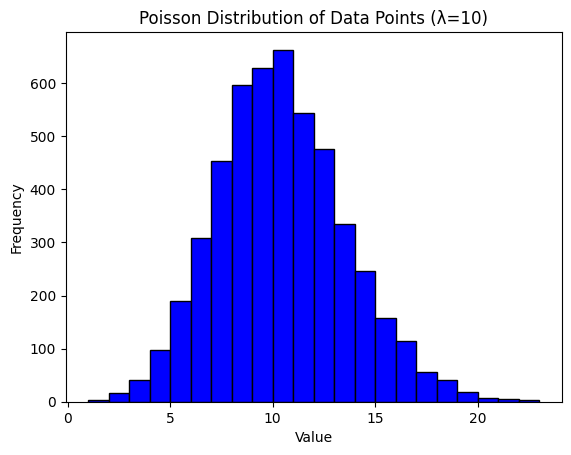

In [38]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson Distribution of Data Points (λ=10)')

plt.bar(bin_centers, counts, width=1.0, color='b', edgecolor='black')

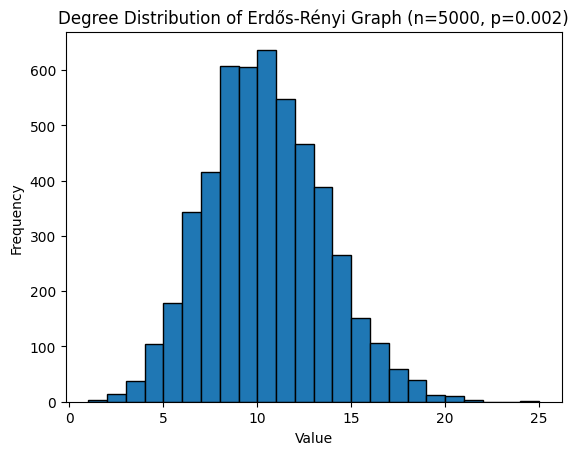

In [39]:
er = nx.erdos_renyi_graph(5000, 0.002)

degrees = [deg for node, deg in er.degree()]

# Step 3: Use numpy.histogram to get the degree distribution
counts, bin_edges = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees) + 2))

# Step 4: Calculate the bin centers (degree values)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 5: Plot the degree distribution as a bar chart
plt.bar(bin_centers, counts, width=1, edgecolor='black', align='center')

# Step 6: Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Erdős-Rényi Graph (n=5000, p=0.002)')

# Display the plot
plt.show()


